In [1]:
import torch
import pickle
import gzip
import matplotlib.pyplot as plt
from torch import nn
import numpy as np

In [2]:
file = gzip.open("mnist.pkl.gz")
((x_train, y_train), (x_valid, y_valid), _ )=pickle.load(file, encoding='latin-1')

In [3]:
x_train[0].shape

(784,)

In [4]:
28*28

784

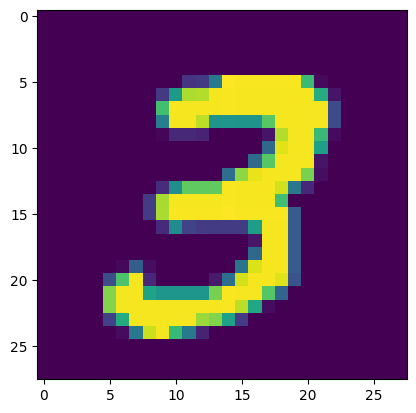

In [6]:
sample_image=x_train[7]
sample_image=sample_image.reshape((28, 28))
plt.imshow(sample_image)

In [7]:
y_train[7]

3

In [8]:
# transform the data into tensors
x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

In [9]:
class fully_connected(nn.Module):
    def __init__(self, input_size=784, hidden_size=128, output_size=10):
        super(fully_connected, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

        self.bn1 = nn.BatchNorm1d(hidden_size)

    def forward(self, xb):
        #print('xb',xb.shape)
        z2 = self.fc1(xb) # z2 = w1*x + b1
        #print('z2',z2.shape)
        a2 = torch.relu(z2) # negative values are set to zero
        #print('a2',a2.shape)
        a2_bn = self.bn1(a2) # batch normalization
        #print('a2_bn',a2_bn.shape)
        y_hat = torch.relu(self.fc2(a2_bn)) # y_hat = w2*a2 + b2
        #print('y_hat',y_hat.shape)
        return y_hat

In [10]:
def get_batch(x, y, batch_size):
    for i in range(0, x.shape[0], batch_size):
        yield x[i:i+batch_size], y[i:i+batch_size]

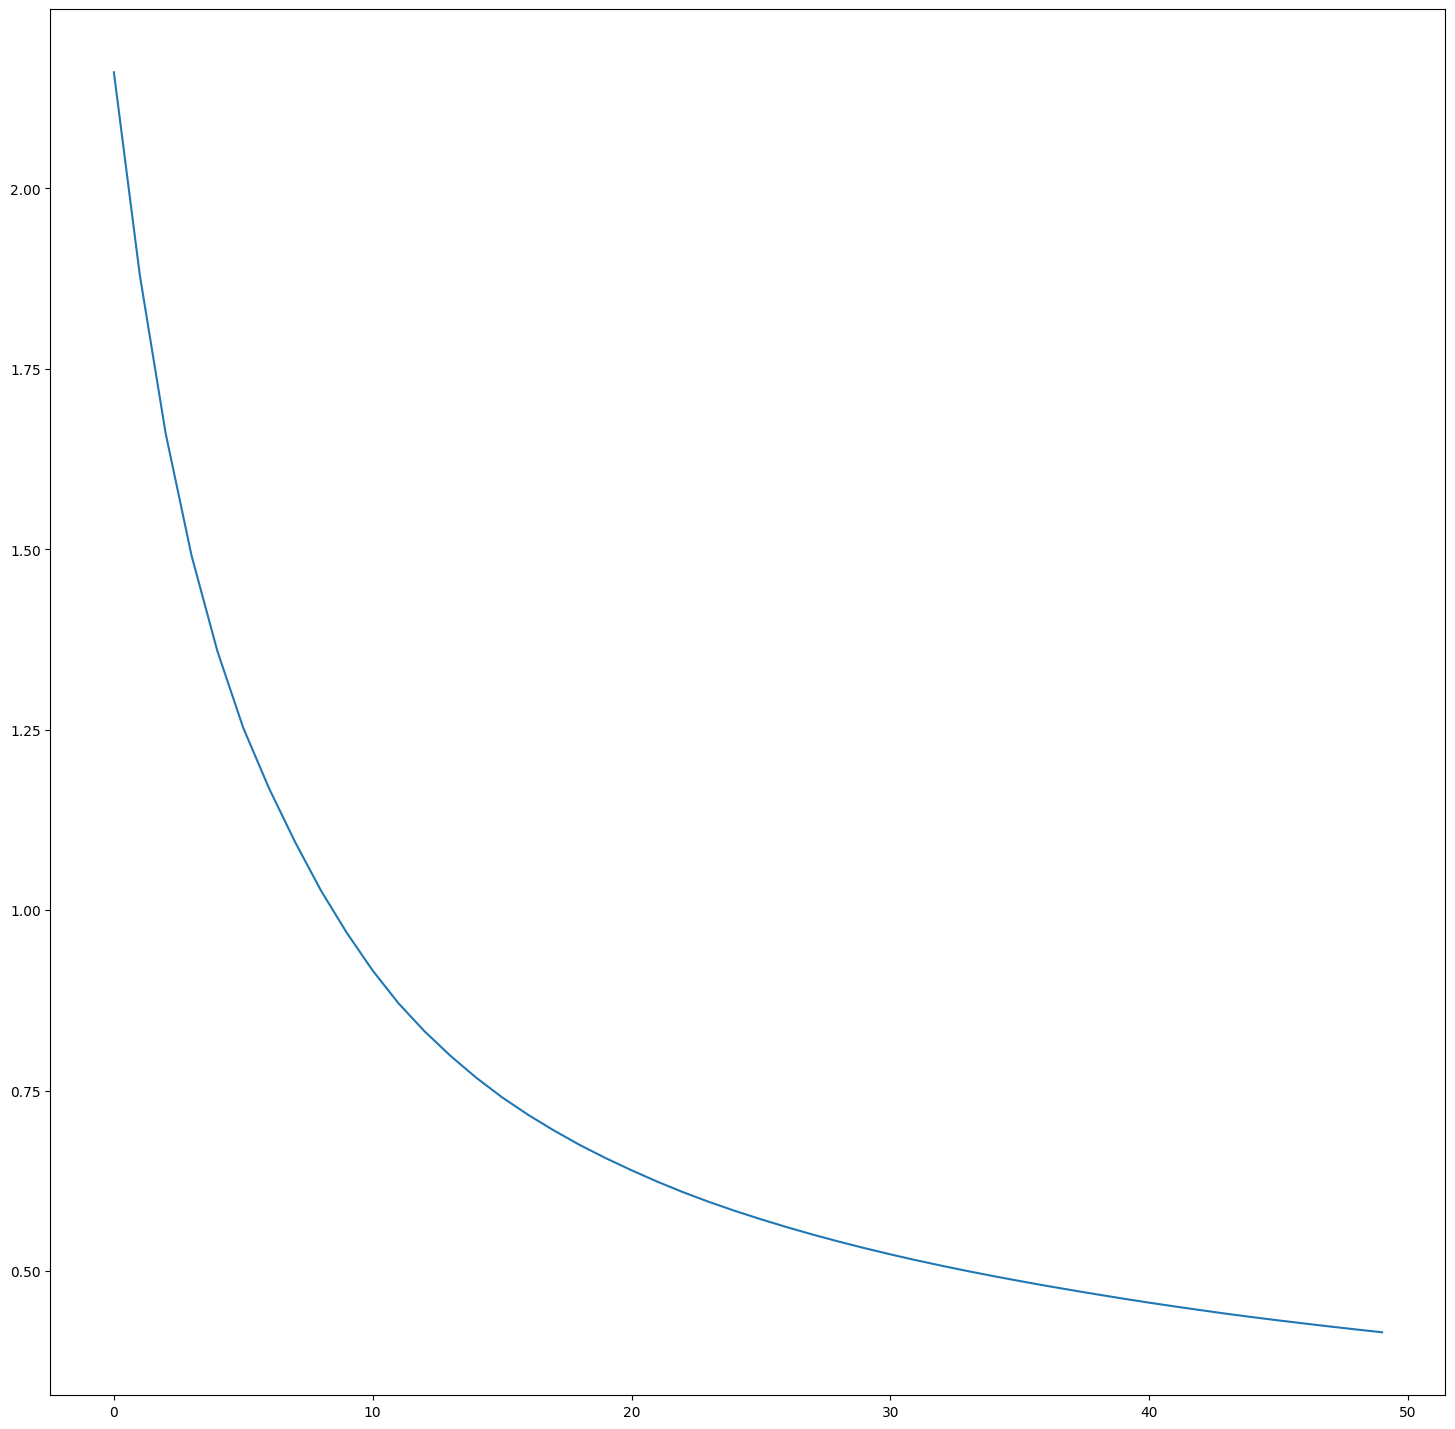

In [15]:
model = fully_connected(input_size=784, hidden_size=128, output_size=10)
loss = nn.CrossEntropyLoss()
lr = 0.0001
batch_size = 100

def train(xb, yb):
    y_hat = model(xb)
    loss_value = loss(y_hat, yb)
    loss_value.backward()
    with torch.no_grad():
        for p in model.parameters():
            p -= p.grad * lr
        model.zero_grad()
    return loss_value.item()

losses = []
for epoch in range(50):
    for xb, yb in get_batch(x_train, y_train, batch_size):
        loss_value = train(xb, yb)
    losses.append(loss_value)

plt.plot(losses)

In [16]:
# testing the model
def accuracy(xb, yb):
    y_hat = model(xb)
    y_hat = torch.argmax(y_hat, dim=1)
    return (y_hat==yb).float().mean()

accuracy(x_valid, y_valid)

tensor(0.9156)

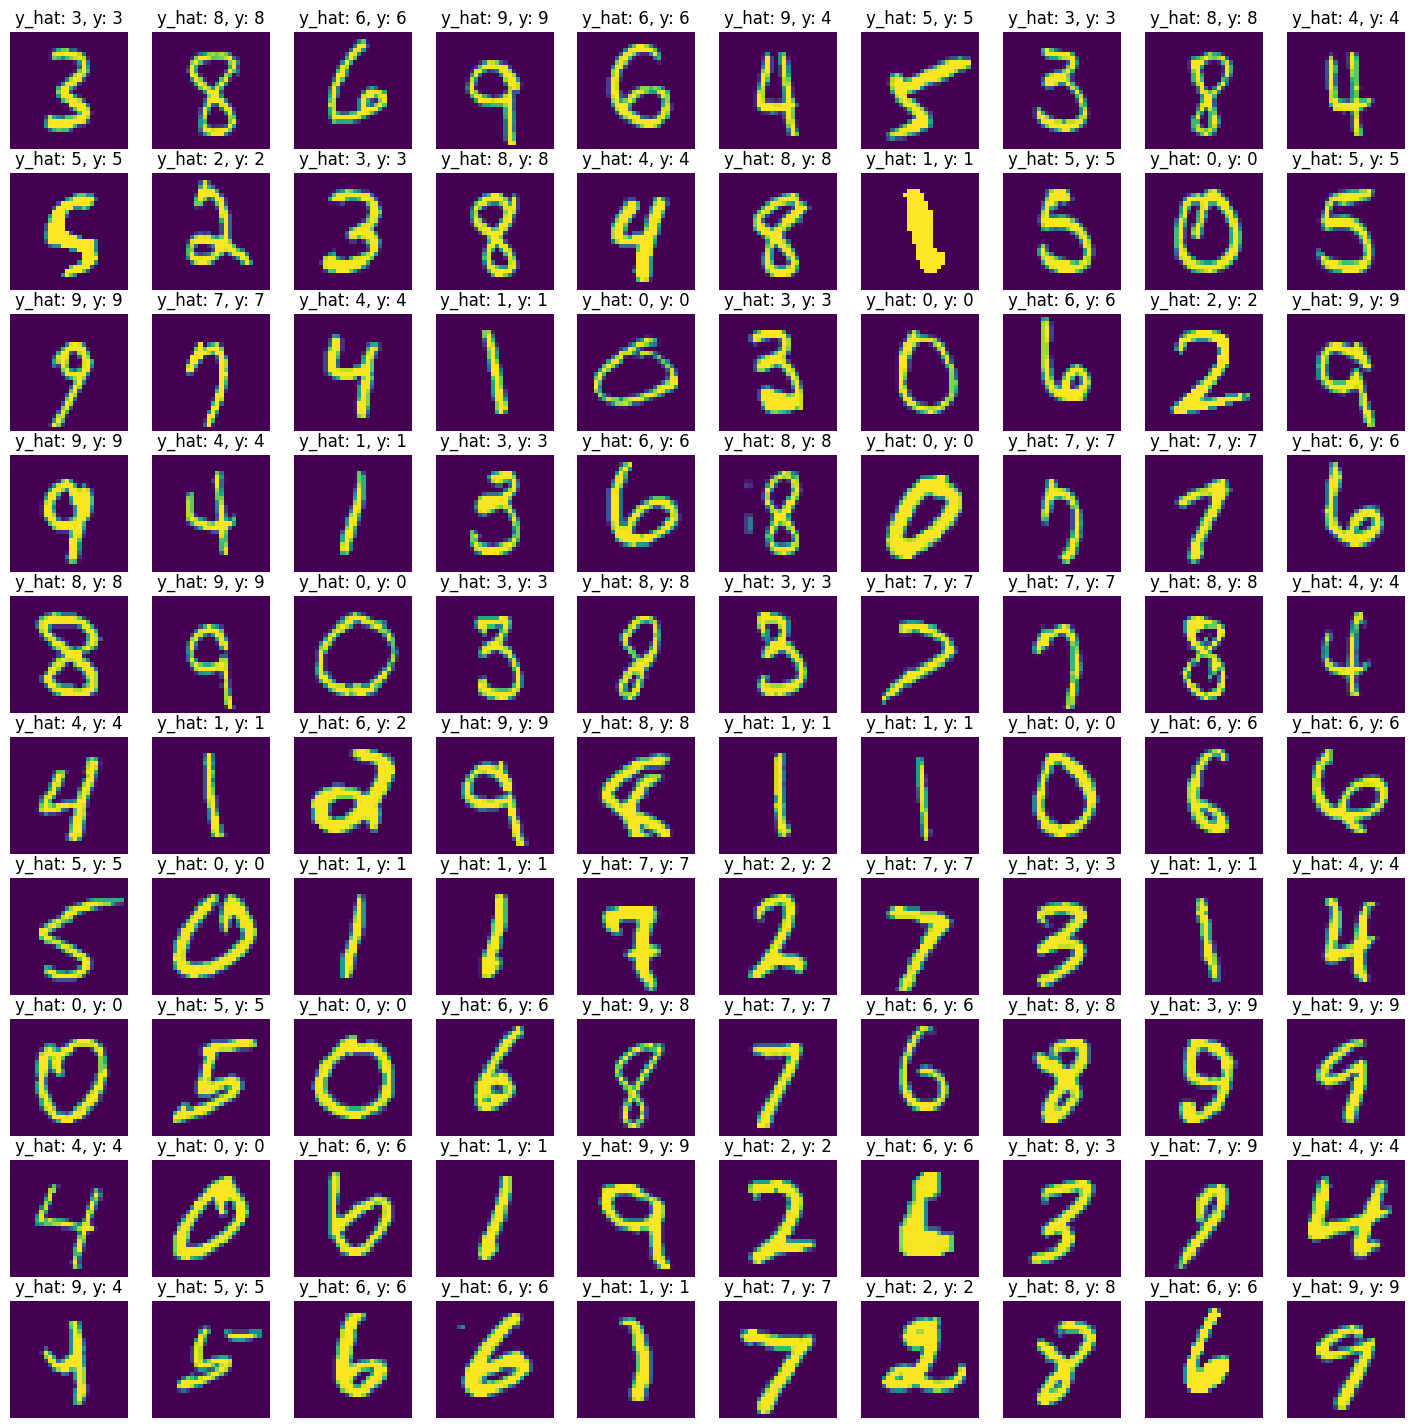

In [17]:
def visualize(xb, yb):
    y_hat = model(xb)
    y_hat = torch.argmax(y_hat, dim=1)
    for i in range(100):
        plt.rcParams["figure.figsize"] = (18,18)
        plt.subplot(10, 10, i+1)
        plt.imshow(xb[i].reshape((28, 28)))
        plt.title('y_hat: {}, y: {}'.format(y_hat[i], yb[i]))
        plt.axis('off')

visualize(x_valid[:100], y_valid[:100])